# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [1]:
import tensorflow
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # no cycles - signal goes all the way through
from tensorflow.keras.layers import Dense       # All full mesh - connection between neurons to all neurons between layers
from tensorflow.keras.optimizers import SGD     # optimizer - stochastic gradient descend
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
y_valid_labels = np.copy(y_valid)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

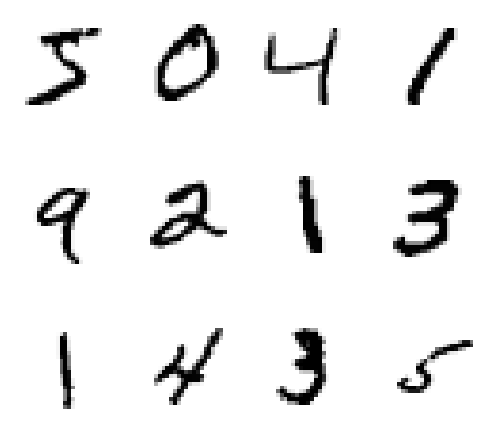

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

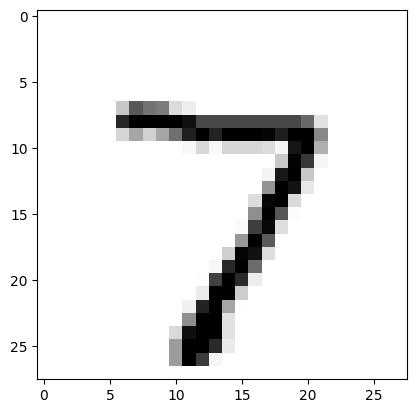

In [9]:
_ = plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

## Loss Functions
- binary_crossentropy - Classsification with only 2 classes
- categorical_crossentropy - Classification with multiple classes
- mean_squared_error - Regression

In [49]:
# model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])       # 0.57 accuracy
# model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # 0.91 accuracy
# model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.5), metrics=['accuracy'])  # 0.98 accuracy but diffrence between training accuracy and validationa accuracy is big
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])    # 0.986 accuracy and validation is close enough

#### Train!

In [78]:
# evolution = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
evolution = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
type(evolution)

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9759
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0862 - val_accuracy: 0.9761
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9760
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9761
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9758
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0868 - val_accuracy: 0.9759
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9761
Epoch 

keras.src.callbacks.History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


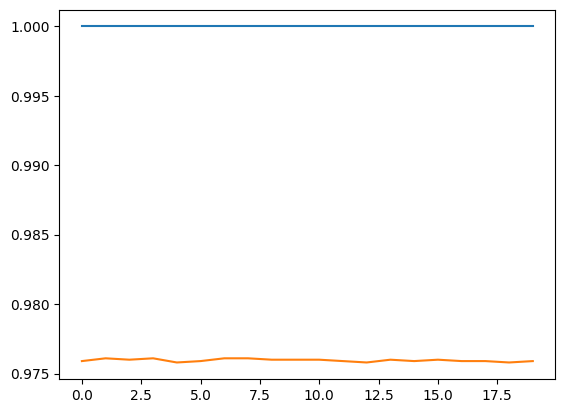

In [79]:
print(evolution.history.keys())
plt.plot(evolution.history['accuracy'])
plt.plot(evolution.history['val_accuracy'])

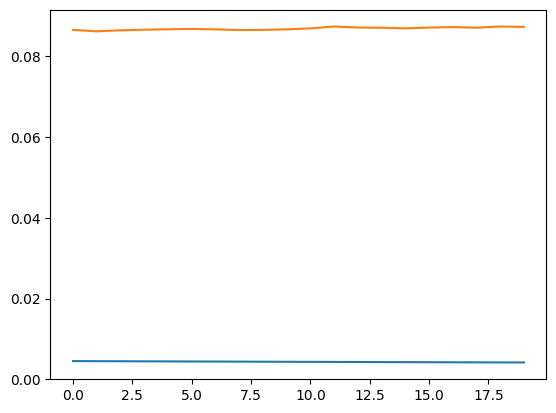

In [80]:
plt.plot(evolution.history['loss'])
plt.plot(evolution.history['val_loss'])

#### Evaluating model performance

In [81]:
print(X_valid.shape)
print(y_valid.shape)
# evaluate the model using the entire validation data set
model.evaluate(X_valid, y_valid)
#from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import confusion_matrix
#labels = [str(digit) for digit in range(10)]
#y_pred = np.array(y_predicted)
#full_cm = confusion_matrix(y_valid, y_pred)
#y_pred.shape

(10000, 784)
(10000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9759


[0.08730589598417282, 0.9758999943733215]

#### Performing inference

In [75]:
print(X_valid[0].shape)
valid_0 = X_valid[0].reshape(1, 784)
X_valid.shape

(784,)


(10000, 784)

In [76]:
# make a prediction with a single and entire data set
class_predict = model.predict(valid_0)
print(class_predict)
class_predicts = model.predict(X_valid)
print(class_predicts.shape)

1/1 [==============================] - 0s 20ms/step
[[3.8517970e-07 1.6582818e-10 2.5737833e-07 3.2427033e-07 1.6719748e-12
  4.2088924e-10 7.2464339e-14 9.9999833e-01 8.9959364e-09 6.5218802e-07]]
313/313 [==============================] - 0s 1ms/step
(10000, 10)


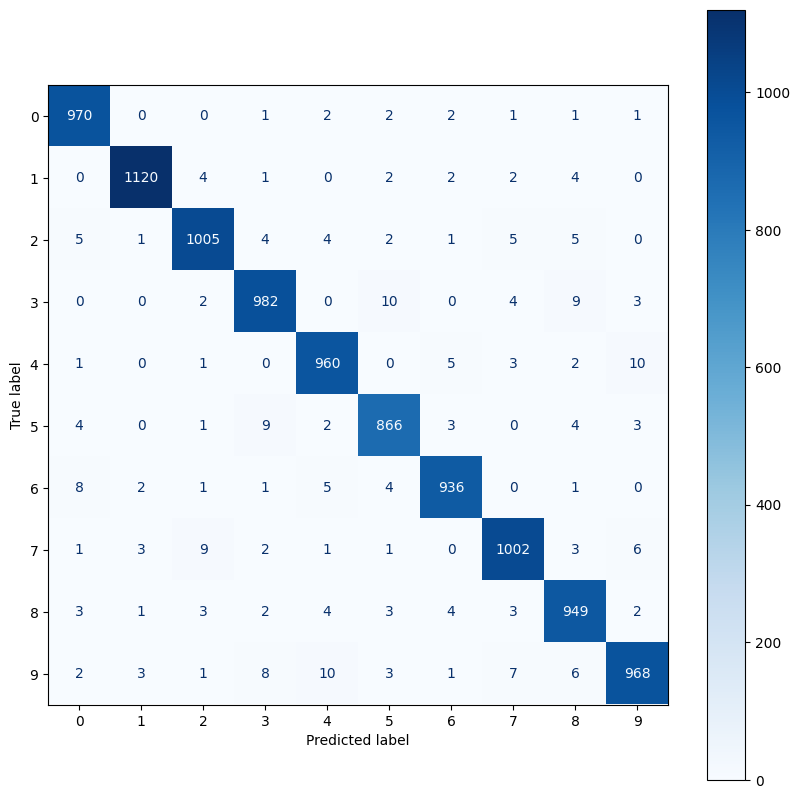

In [77]:
# Plot full confusion matrix for MNIST classification
# import CM object from sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# create labels - human readable
labels = [str(digit) for digit in range(10)]

# predicted labels based on the trained model
# change from the one-hot to human-readable class label
y_new = np.array(np.argmax(class_predicts, axis=1))

# create confusion matrix object, y_valid_labels - copy of the original data before reshaping
full_cm = confusion_matrix(y_valid_labels, y_new)

# plot the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=full_cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [ ]:
## The predict_classes() method no longer exists in recent TensorFlow releases. Instead you could use:
# import numpy as np
# np.argmax(model.predict(valid_0), axis=-1)

text 3 activtion functions - 2 weeks